# Summary

Visualize ray speed indicatrix and normal slowness figuratrix in various ways.

### Preliminaries

In [1]:
# Specify the parameter files for the job
import os
if 'GME_NB_PR' not in os.environ.keys():
    pr_filenames = ['Indicatrix_sinbeta_eta0p5']   
else:
    pr_filenames = eval(os.environ['GME_NB_PR'])

# Import Sympy and Numpy and set up latex inline & pretty dict printing
import sympy as sy, numpy as np
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import simplify, Matrix, Rational
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint

# Import Geomorphysics library functions, classes
from gmplib.utils import numify, get_pkg_path, export_results
from gmplib.save import create_directories, export_plots
from gmplib.parameters import import_parameters, Parameters

# Import GME classes and do a wildcard (!) import of all GME symbol definitions
from gme.symbols import *
from gme.equations import Equations
from gme.plot import TheoryPlots

# Decide where we're working and thus where to find the job parameter files
#   -  use the GME_WORKING_PATH environment variable if it's defined
#   -  otherwise, deduce that we're working in the GME notebook dir
if 'GME_WORKING_PATH' in os.environ.keys():
    working_path = os.environ['GME_WORKING_PATH']
    print(f'Fetching working path from environment variable GME_WORKING_PATH = {working_path}')
else:
    from gmplib.utils import get_pkg_path
    import gme
    working_path = get_pkg_path(gme, dirname='')
    print(f'Deducing working path from GME package location = {working_path}')
    del gme

# Set the path to the parameter files for this nb and report
pr_path = os.path.join(working_path,'Parameters','Theory')
pr_path, pr_filenames

Fetching working path from environment variable GME_WORKING_PATH = /Users/colinstark/Projects/GME


('/Users/colinstark/Projects/GME/Parameters/Theory',
 ['Indicatrix_sinbeta_eta1p5'])

In [2]:
parameters_dict,_ = import_parameters([pr_path], [os.path.join('..','defaults'), *pr_filenames])
evaluations = {}
evaluations_sequence = ()
pr = Parameters(parameters_dict, evaluations=evaluations, sequence=evaluations_sequence)
[pp(psubobj.__dict__) for psubobj in (pr.job, pr.model, pr.solve, pr.resolve, pr.plot, pr.save)];

{   'debug': False,
    'group_name': 'Theory',
    'short_name': 'indicatrix',
    'subtitle': '',
    'title': 'Indicatrix & figuratrix viz, eta=3/2, sin(beta) xi model',
    'verbose': True,
    'very_verbose': False}
{   'beta_type': 'sin',
    'do_geodesic': False,
    'eta': 3/2,
    'h_0': 1/2,
    'ibc_type': 'concave-up',
    'kappa_h': 3/2,
    'mu': 1/2,
    't_xiv0_list': None,
    'varepsilon': 1/100,
    'varphi_0': 300,
    'varphi_type': 'ramp',
    'x_1': 1,
    'x_h': 1,
    'x_sigma': 0.01,
    'xiv_0': None}
{   'choice': 'Hamilton',
    'do_dense': True,
    'do_geodesic': True,
    'do_ic': False,
    'do_ip': False,
    'do_vb': False,
    'ic_res': 31,
    'ip_res': 101,
    'method': {   'Hamilton': 'DOP853',
                  'choices': ['RK45', 'RK23', 'Radau', 'DOP853', 'LSODA'],
                  'geodesic': 'LSODA'},
    'ray_n_t': 301,
    't_distribn': 2,
    't_end': 0.01,
    'vb_res': 101}
{   'do_eliminate_caustics': True,
    'n_isochrones': 30,
   

# Equations

Generate the GME equation set. Sympy implementation works for $\eta=\tfrac{1}{2}$ and $\eta=1$ but not yet for $\eta=\tfrac{3}{2}$.

In [3]:
gmeq = Equations( eta=pr.model.eta, 
                  mu=pr.model.mu, 
                  beta_type=pr.model.beta_type, 
                  varphi_type=pr.model.varphi_type, 
                  do_idtx=True )

In [4]:
prefix = pr.job.short_name
suffix = f'_{pr.model.beta_type}beta_eta{float(sy.N(gmeq.eta))}'
suffix = suffix.replace('.','p')

job_name = prefix+suffix
job_name

'indicatrix_sinbeta_eta1p5'

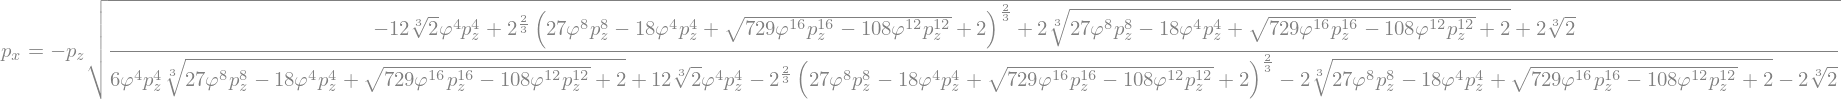

In [5]:
gmeq.fgtx_px_pz_varphi_eqn

In [6]:
# gmeq.idtx_rdotx_pz_varphi_eqn

# Log-polar plot

Visualize both indicatrix and figuratrix on one log-polar graph.

In [7]:
gr = TheoryPlots()

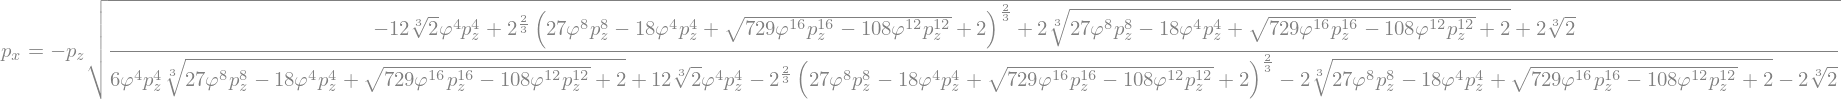

In [8]:
gmeq.fgtx_px_pz_varphi_eqn

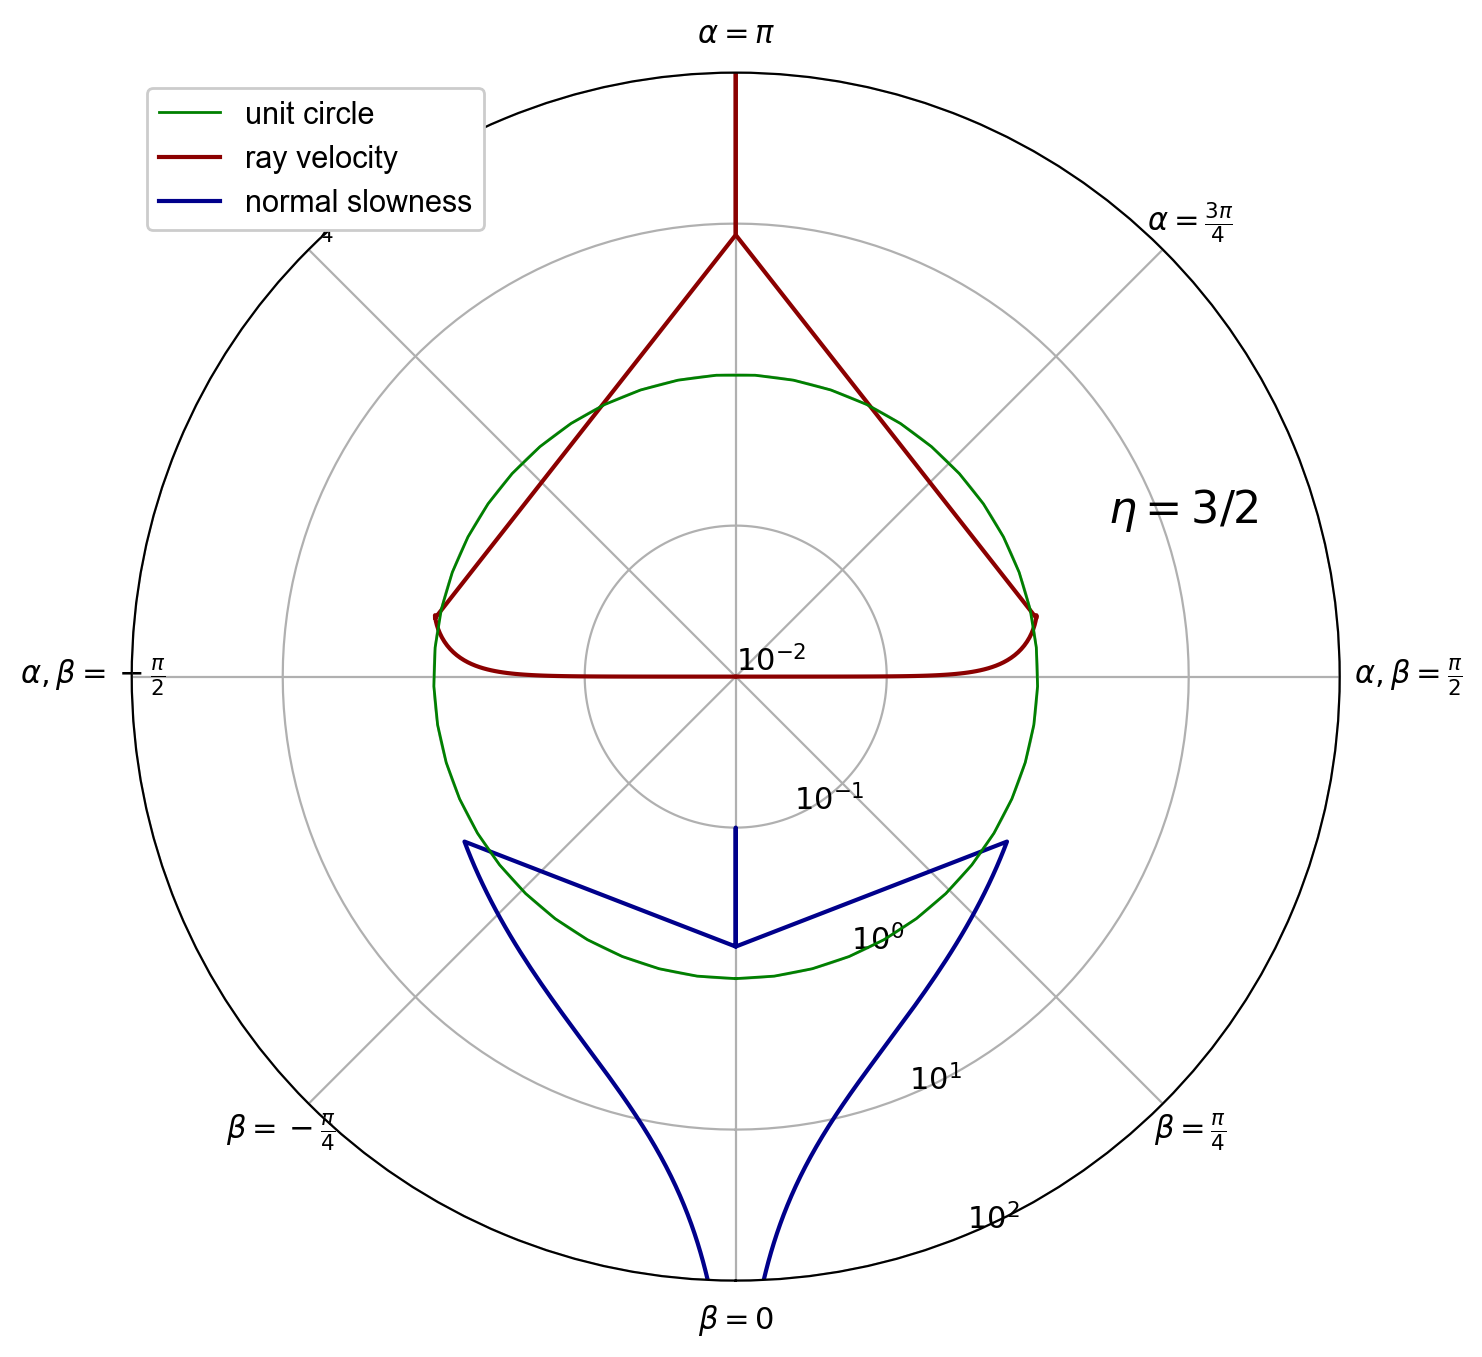

In [9]:
gr.comparison_logpolar( gmeq, job_name+'_comparison_logpolar', fig_size=pr.plot.fig_size, 
                        idtx_pz_min=pr.plot.idtx_pz_min, idtx_pz_max=pr.plot.idtx_pz_max, 
                        fgtx_pz_min=pr.plot.fgtx_pz_min, fgtx_pz_max=pr.plot.fgtx_pz_max, 
                        y_limits=pr.plot.idtx_logpolar_y_limits, 
                        n_points=pr.plot.idtx_n_points )

# Conjugacy for $\varphi=1$

Visualize, for $\varphi=1$, the conjugacy of $\vec{v}$ and $\mathbf{\widetilde{p}}$ as well as their relationship to the unit circle.

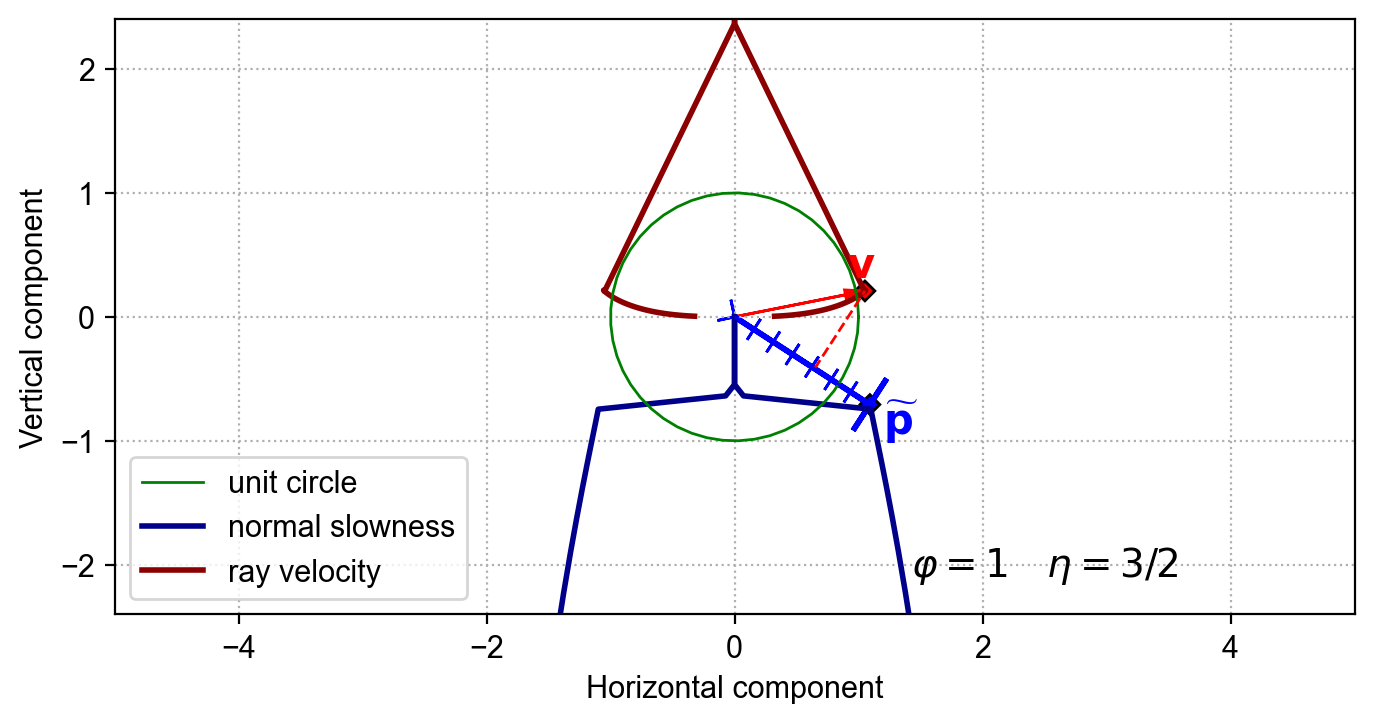

In [10]:
gr.relative_geometry( gmeq, job_name+'_relative_geometry', fig_size=pr.plot.fig_size,
                      varphi_=1, do_annotations=False, zoom_factor=1, do_shapes=True, x_max=5 )

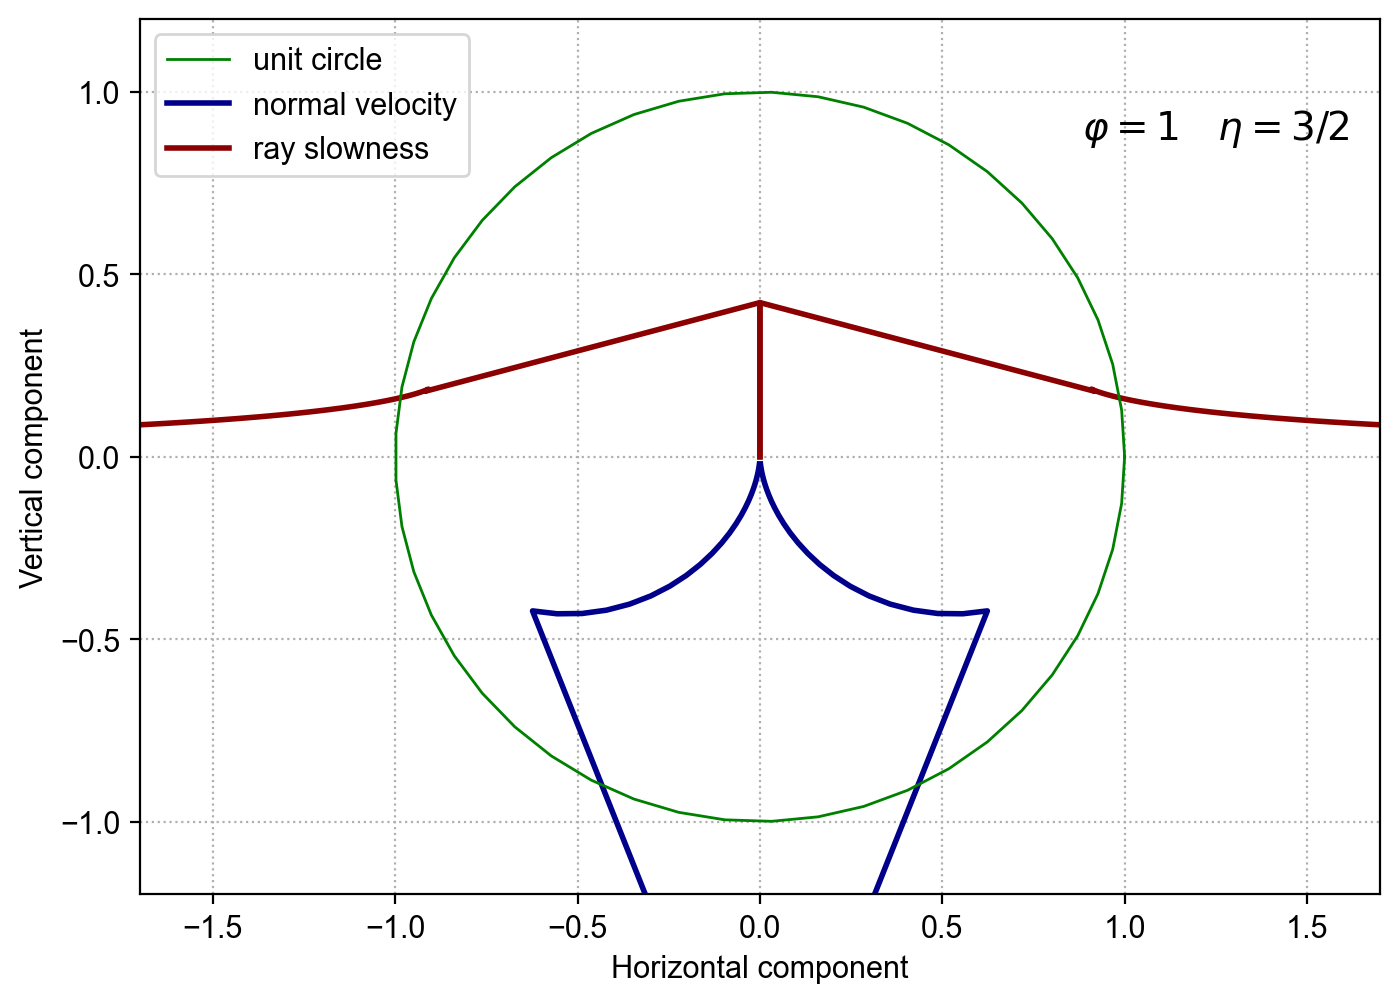

In [11]:
gr.relative_geometry( gmeq, job_name+'_relative_geometry_ray_slowness', fig_size=pr.plot.fig_size,
                      varphi_=1, do_annotations=False, zoom_factor=0.5, 
                      do_half=False, do_legend=True, do_pz=False,
                      do_text_labels=False, do_arrows=False, do_lines_points=False,
                      n_points=pr.plot.idtx_n_points, 
                      do_shapes=False, do_ray_slowness=True, pz_min=pr.plot.idtx_pz_min)

# Conjugacy for range of $\varphi$

Demonstrate how $\vec{v}$ and $\mathbf{\widetilde{p}}$ covary, as $\varphi$ changes, in order to maintain conjugacy.

1
1.3
2
3


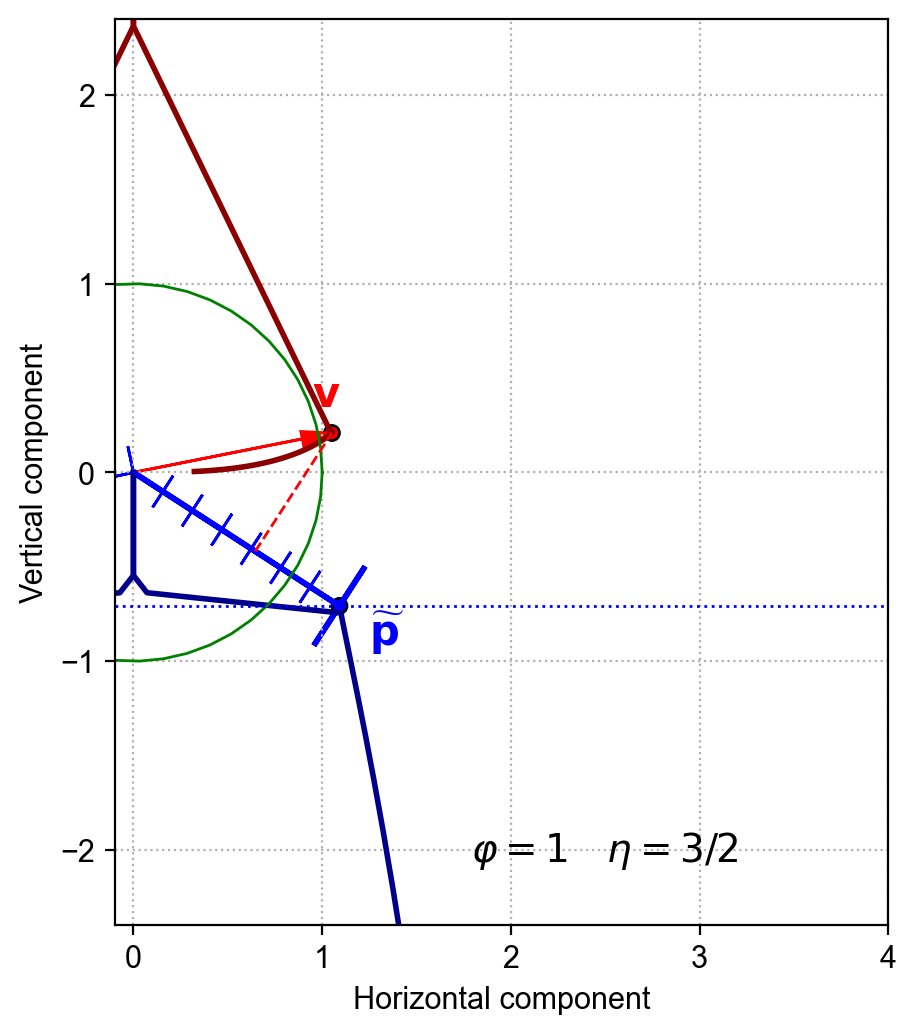

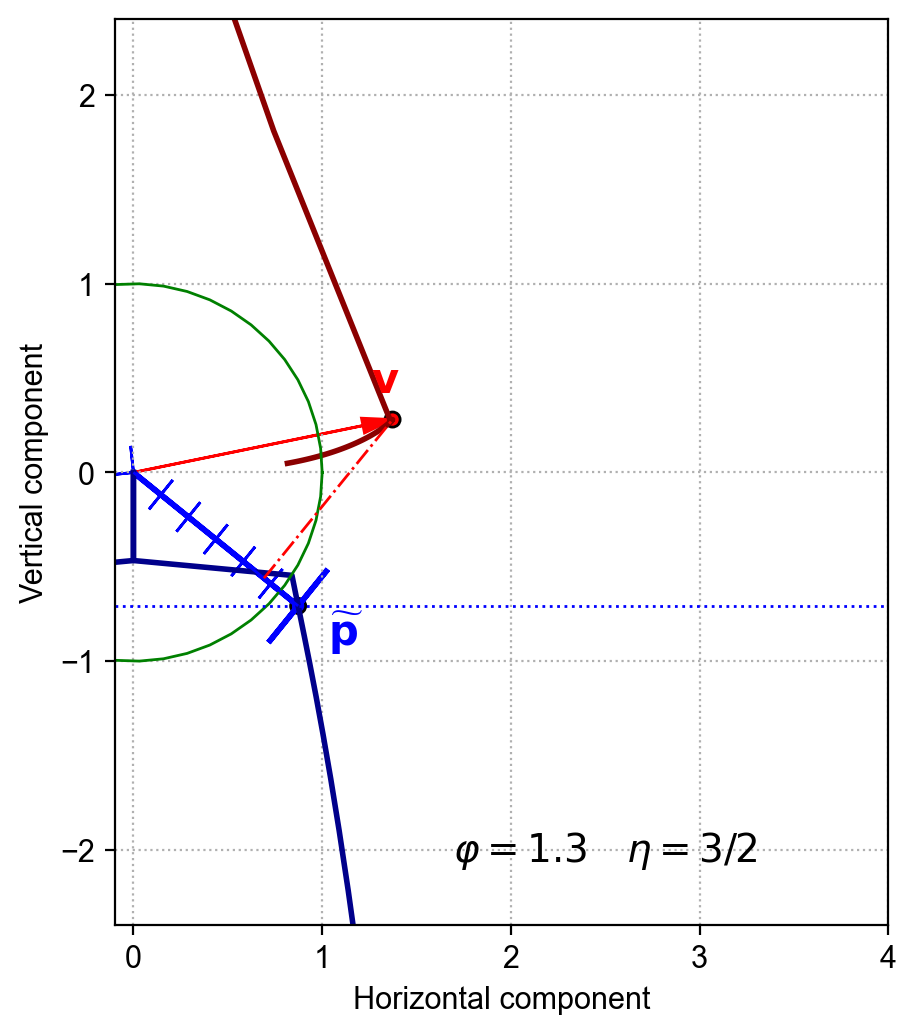

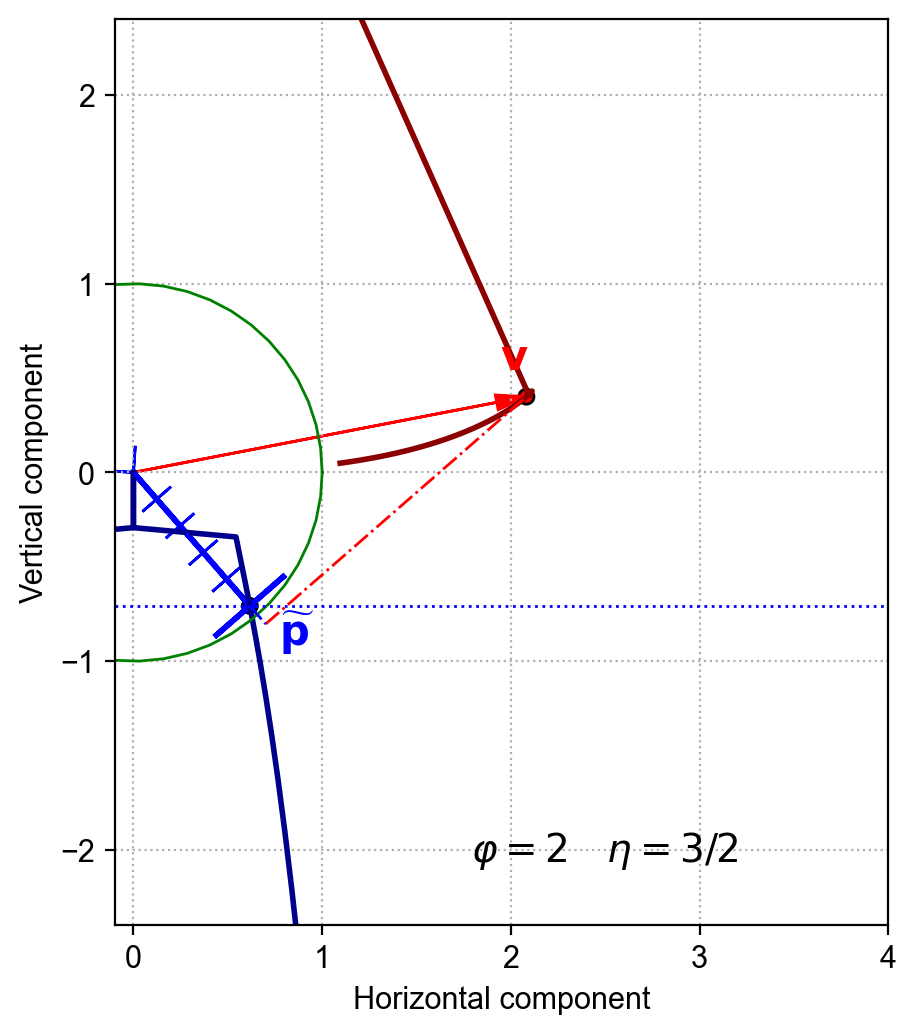

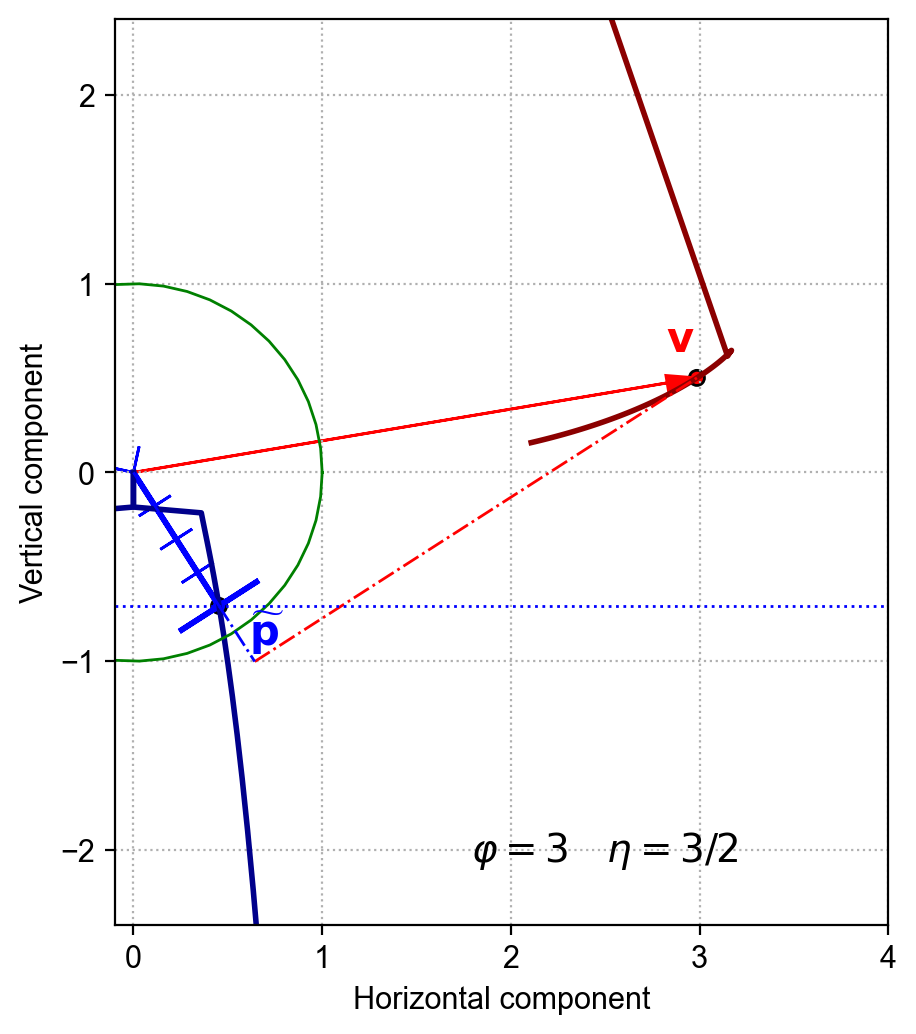

In [12]:
for varphi_ in pr.plot.idtx_varphi_list:
    print(varphi_)
    gr.relative_geometry( gmeq, job_name+f'_relative_geometry_varphi{varphi_}'.replace('.','p'), 
                          fig_size=pr.plot.medium_fig_size,
                          do_annotations=False, varphi_=varphi_, zoom_factor=1, 
                          do_half=True, do_legend=False, do_pz=True, x_max=4, 
                          n_points=pr.plot.idtx_n_points, 
                          pz_min=pr.plot.idtx_pz_min )

# Save

In [13]:
plots_dir = create_directories(pr.save.figs_path, pr.job.group_name)
export_plots( gr.fdict, plots_dir, pr.save.figs_format, suffix='' )

Writing to dir: "/Users/colinstark/Projects/GME/Plots/Theory"
Exported "indicatrix_sinbeta_eta1p5_comparison_logpolar.png"
Exported "indicatrix_sinbeta_eta1p5_relative_geometry.png"
Exported "indicatrix_sinbeta_eta1p5_relative_geometry_ray_slowness.png"
Exported "indicatrix_sinbeta_eta1p5_relative_geometry_varphi1.png"
Exported "indicatrix_sinbeta_eta1p5_relative_geometry_varphi1p3.png"
Exported "indicatrix_sinbeta_eta1p5_relative_geometry_varphi2.png"
Exported "indicatrix_sinbeta_eta1p5_relative_geometry_varphi3.png"
